In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [5]:
import yfinance as yf
import seaborn as sns

In [6]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [7]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [8]:
tech_list = ['HDB']   #, 'RELIANCE.NS', 'TCS.NS', 'SBIN.NS']

In [9]:
end = datetime.now()
start = "2006-12-29"

In [10]:
for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [11]:
HDB

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-12-29,7.650000,7.656000,7.511000,7.548000,6.753228,1686000
2007-01-03,7.700000,7.704000,7.456000,7.493000,6.704020,2278000
2007-01-04,7.490000,7.534000,7.389000,7.479000,6.691495,2269000
2007-01-05,7.500000,7.500000,7.273000,7.321000,6.550131,1718000
2007-01-08,7.272000,7.353000,7.203000,7.260000,6.495553,2070000
...,...,...,...,...,...,...
2023-11-27,59.250000,59.480000,58.860001,58.889999,58.889999,1360700
2023-11-28,59.000000,59.730000,58.770000,59.349998,59.349998,2119200
2023-11-29,59.860001,60.799999,59.740002,60.549999,60.549999,3120800


In [12]:
stk_list = [HDB]
com_name = ["HDFC"]

In [13]:
for comp, c_name in zip(stk_list, com_name):
    comp["company_name"] = c_name

In [14]:
df = pd.concat(stk_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-11-17,58.099998,58.270000,57.619999,58.139999,58.139999,1019800,HDFC
2023-11-20,57.919998,58.410000,57.740002,58.270000,58.270000,1174900,HDFC
2023-11-21,58.660000,59.270000,58.529999,58.849998,58.849998,2091100,HDFC
2023-11-22,58.939999,59.099998,58.610001,58.639999,58.639999,983000,HDFC
2023-11-24,59.169998,59.529999,58.970001,59.500000,59.500000,736300,HDFC
2023-11-27,59.250000,59.480000,58.860001,58.889999,58.889999,1360700,HDFC
2023-11-28,59.000000,59.730000,58.770000,59.349998,59.349998,2119200,HDFC
2023-11-29,59.860001,60.799999,59.740002,60.549999,60.549999,3120800,HDFC
2023-11-30,60.310001,60.820000,59.810001,60.040001,60.040001,2394500,HDFC


In [15]:
df["Adj Close"]

Date
2006-12-29     6.753228
2007-01-03     6.704020
2007-01-04     6.691495
2007-01-05     6.550131
2007-01-08     6.495553
                ...    
2023-11-27    58.889999
2023-11-28    59.349998
2023-11-29    60.549999
2023-11-30    60.040001
2023-12-01    60.709999
Name: Adj Close, Length: 4260, dtype: float64

<AxesSubplot: xlabel='Date'>

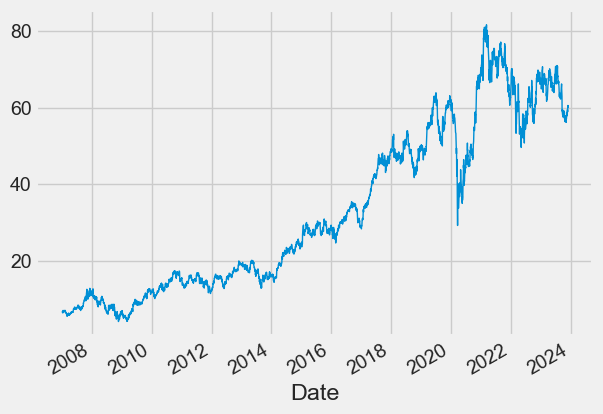

In [16]:
df["Adj Close"].plot(linewidth = "1")

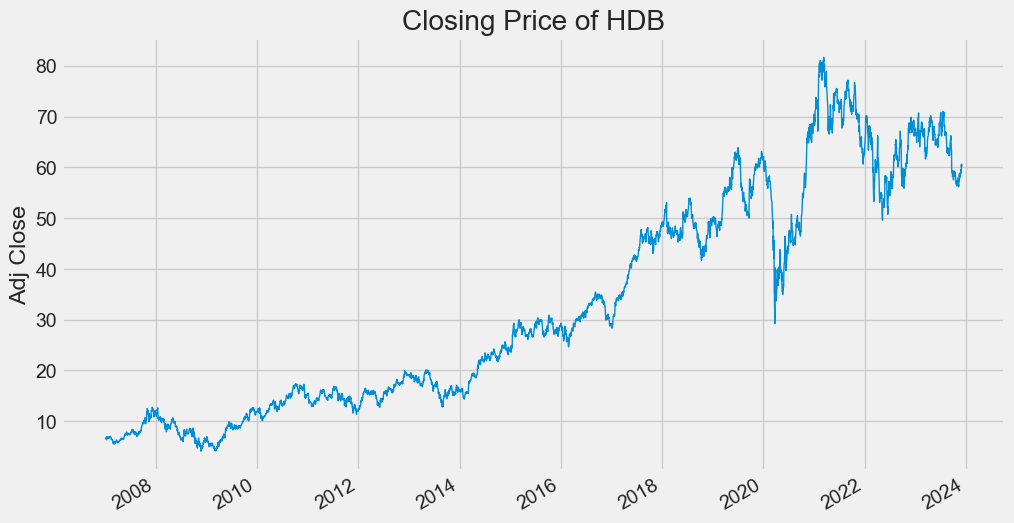

In [17]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stk_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(linewidth = "1")
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

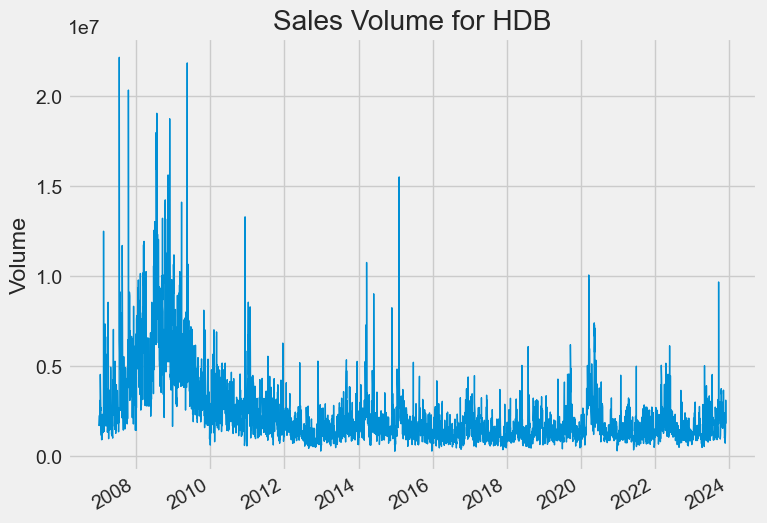

In [18]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stk_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(linewidth='1')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

In [19]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

4047

In [20]:
dataset

array([[ 7.54799986],
       [ 7.49300003],
       [ 7.47900009],
       ...,
       [60.54999924],
       [60.04000092],
       [60.70999908]])

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [22]:
scaled_data

array([[0.03815714],
       [0.03746292],
       [0.03728621],
       ...,
       [0.70716313],
       [0.70072579],
       [0.7091827 ]])

In [23]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [24]:
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [25]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=1) 

3987/3987 [==============================] - 122s 30ms/step - loss: 0.0010


In [26]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7/7 [==============================] - 2s 22ms/step


2.344422824595805

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\sunan\AppData\Local\Temp\ipykernel_40588\2657761684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [28]:
valid

,Close,Predictions
Date,,
2023-01-30,66.000000,68.567772
2023-01-31,67.360001,67.688614
2023-02-01,64.680000,67.960030
2023-02-02,67.099998,67.571442
2023-02-03,67.480003,68.137314
...,...,...
2023-11-27,58.889999,60.936886
2023-11-28,59.349998,61.018555
2023-11-29,60.549999,61.150509


In [29]:
(np.sum((valid["Predictions"] - valid["Close"])**2))/len(valid)

5.496318380485773

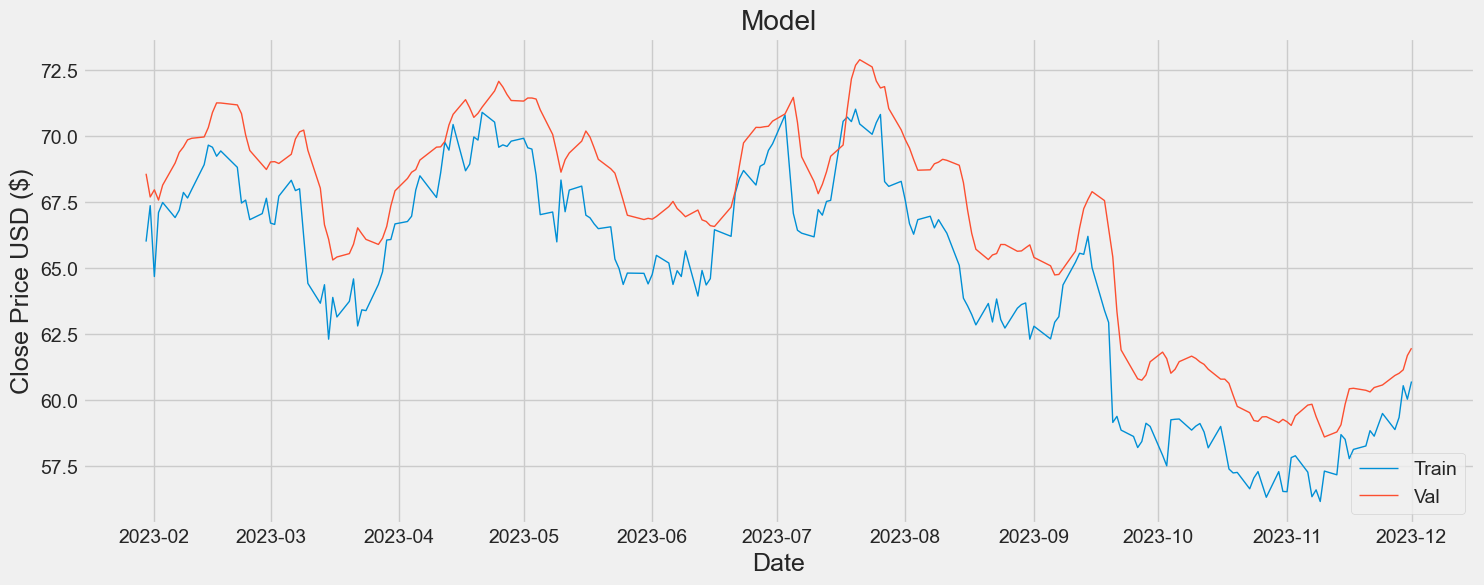

In [30]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'], linewidth="1")
plt.plot(valid[['Close', 'Predictions']], linewidth="1")
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [31]:
valid

,Close,Predictions
Date,,
2023-01-30,66.000000,68.567772
2023-01-31,67.360001,67.688614
2023-02-01,64.680000,67.960030
2023-02-02,67.099998,67.571442
2023-02-03,67.480003,68.137314
...,...,...
2023-11-27,58.889999,60.936886
2023-11-28,59.349998,61.018555
2023-11-29,60.549999,61.150509
